# Final Project
## Can we predict whether a mushroom is edible or poisonous? 

### March 9, 2022

**My Checklist!**
- Explore the data
    - subplots displaying the overall trends of certain variables
    - variable types
    - number of unique values per variables
    - check class distribution
- Pre-process the data
    - convert nominal to numerical
    - handle the null values
    - feature engineering
        - correlation matrix
        - plot that displays the most important features
    - Label encoding 
    - standardize
    - resampling (smoteen?)
- Compute classification models
    - Decision tree
    - Logistic regression 
    - KNN
    - Random Forest
    - XGBoost
- Tune the models
    - GridSearchCV
    - Select best way to evaluate the model (recall??)
- Finalize model
    - Choose whichever model is the best
- Write interpretations and conclusions
- Create presentation
- Create ETL
- Create Data model

**Set-up and Initial Exploration**

In [1]:
# load initial libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the 1987 original data set
mushroom = pd.read_csv('1987_data.csv')

# View the first few rows
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom.shape

(8124, 23)

### Exploratory Analysis

Before any modeling or pre-processing, we will first explore the data to better understand overall trends, data types, etc.

**Examine the dependent variable**

In [4]:
# There are precisely two class variables: poisonous and edible
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

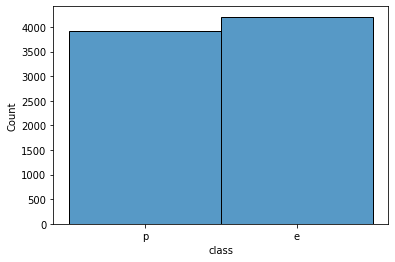

In [3]:
# View the distribution to see how equal they are
# Edible is the minority class
g = sns.histplot(x='class', data=mushroom)

In [5]:
# Total poisonous
poison = sum(mushroom['class']=='p')
# Total edible
edible = sum(mushroom['class']=='e')

# Distribution of classes
print(poison/(len(mushroom.index)))
print(edible/len(mushroom.index))

0.48202855736090594
0.517971442639094


Approximately 48% of the data are poisonous, while 52% of the data are edible. This is a reasonably equal distribution for our model. We will run this again after pre-processing and handling nulls to ensure we did not exacerbate any class inequities. 

**Examine variables**

In [6]:
# View numerical data
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# Loop through variables in data frame
for col in mushroom.columns:
    # print unique variables
    print(f'{col}: {mushroom[col].unique()}')

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


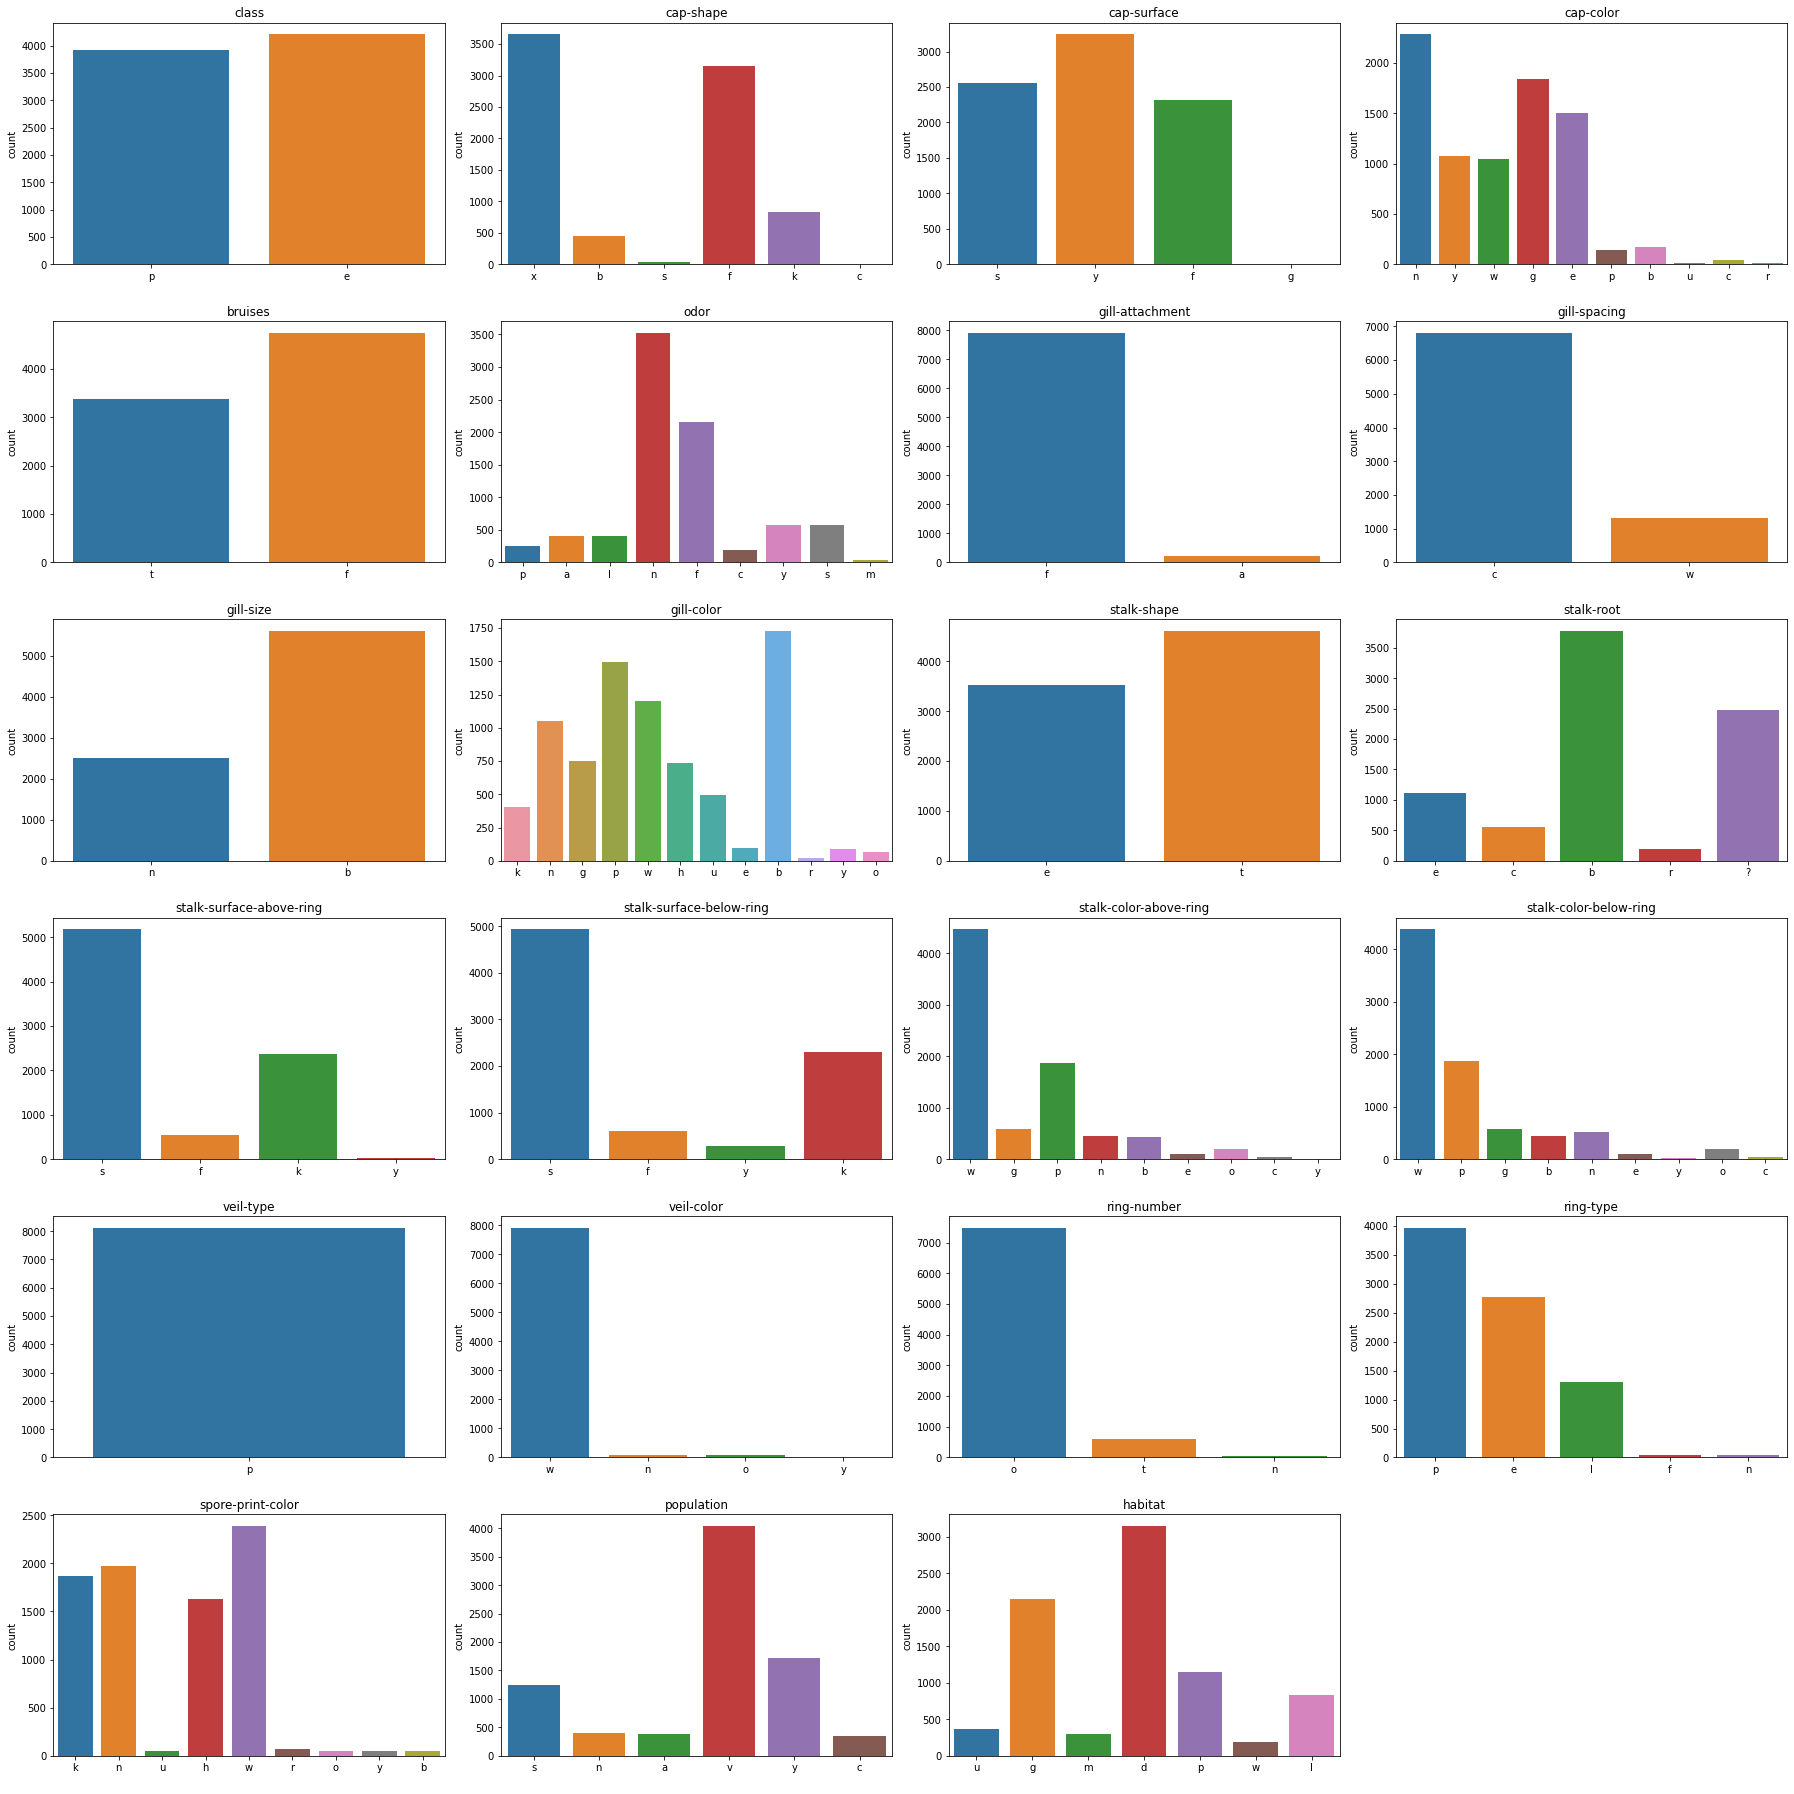

In [30]:
# Place the nominal variables into a list
mush_vars = mushroom.columns.tolist()

# Set columns and rows
cols = 4
rows = 6

# Set fig size
fig = plt.figure(figsize=(25, 25))


# Set up subplots
for i, val in enumerate(mush_vars):
    # 6 rows and 4 cols with 17 plots
    ax = fig.add_subplot(rows, cols, i+1, title=val)

    # Extract the data
    sns.countplot(x=val, data=mushroom)
    # Remove the x label
    ax.set(xlabel = ' ')
    # edit layout
    fig.tight_layout(pad=1.0)

### Database management

In order to create the data model and import the data into postgres, we will need to create unique identifiers in the data

In [31]:
# import uuid
import uuid

# create new variable with a unique ID. This will serve as the primary key
mushroom['mushroomID'] = mushroom[mush_vars].sum(axis=1)

# view data frame
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroomID
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,pxsntpfcnkeesswwpwopksu
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,exsytafcbkecsswwpwopnng
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,ebswtlfcbnecsswwpwopnnm
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,pxywtpfcnneesswwpwopksu
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,exsgfnfwbktesswwpwoenag


In [32]:
# Confirmed there are 8124 values, indicating that every possible combination is unique 
mushroom['mushroomID'].nunique()

8124

**Table for the basic mushroom features**

In [33]:
# These are the basic features for our mushroom data frame
mushroom_features = mushroom[['class', 'bruises', 'odor', 'spore-print-color', 'population', 'habitat', 'mushroomID']]

**Tables for parts of the mushroom (cap, gill, stalk, veil, which includes ring)**

In [36]:
# All of the cap features
cap_features = mushroom[['cap-shape', 'cap-surface', 'cap-color']]
cap_features['capID'] = cap_features[['cap-shape', 'cap-surface', 'cap-color']].sum(axis=1)

# All of the gill features
gill_features = mushroom[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
gill_features['gillID'] = gill_features[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']].sum(axis=1)

# All of the stalk features
stalk_features = mushroom[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']]
stalk_features['stalkID'] = stalk_features[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']].sum(axis=1)

# All of the veil features
# ring is combined with veil because they are part of the same thing on mushroom anatomy 
veil_features = mushroom[['veil-type', 'veil-color', 'ring-number', 'ring-type']]
veil_features['veilID'] = veil_features[['veil-type', 'veil-color', 'ring-number', 'ring-type']].sum(axis=1)

C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4027848101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_features['capID'] = cap_features[['cap-shape', 'cap-surface', 'cap-color']].sum(axis=1)
C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4027848101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gill_features['gillID'] = gill_features[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']].sum(axis=1)
C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4027848101.py:9: SettingWithCop

Just wanting to explore and see how many unique combinations there are per category. It appears now that we can add these ID types back into the original mushroom data frame.

In [41]:
print(cap_features['capID'].nunique())
cap_features.head()

90


,cap-shape,cap-surface,cap-color,capID
0,x,s,n,xsn
1,x,s,y,xsy
2,b,s,w,bsw
3,x,y,w,xyw
4,x,s,g,xsg


In [42]:
print(gill_features['gillID'].nunique())
gill_features.head()

34


,gill-attachment,gill-spacing,gill-size,gill-color,gillID
0,f,c,n,k,fcnk
1,f,c,b,k,fcbk
2,f,c,b,n,fcbn
3,f,c,n,n,fcnn
4,f,w,b,k,fwbk


In [43]:
print(stalk_features['stalkID'].nunique())
stalk_features.head()

63


,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,stalkID
0,e,e,s,s,w,w,eessww
1,e,c,s,s,w,w,ecssww
2,e,c,s,s,w,w,ecssww
3,e,e,s,s,w,w,eessww
4,t,e,s,s,w,w,tessww


In [44]:
print(veil_features['veilID'].nunique())
veil_features.head()

10


,veil-type,veil-color,ring-number,ring-type,veilID
0,p,w,o,p,pwop
1,p,w,o,p,pwop
2,p,w,o,p,pwop
3,p,w,o,p,pwop
4,p,w,o,e,pwoe


**Add the IDs back into the original data frame**

In [45]:
# All of the cap features
mushroom['capID'] = cap_features[['cap-shape', 'cap-surface', 'cap-color']].sum(axis=1)

# All of the gill features
mushroom['gillID'] = gill_features[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']].sum(axis=1)

# All of the stalk features
mushroom['stalkID'] = stalk_features[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']].sum(axis=1)

# All of the veil features
# ring is combined with veil because they are part of the same thing on mushroom anatomy 
mushroom['veilID'] = veil_features[['veil-type', 'veil-color', 'ring-number', 'ring-type']].sum(axis=1)

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,ring-number,ring-type,spore-print-color,population,habitat,mushroomID,capID,gillID,stalkID,veilID
0,p,x,s,n,t,p,f,c,n,k,...,o,p,k,s,u,pxsntpfcnkeesswwpwopksu,xsn,fcnk,eessww,pwop
1,e,x,s,y,t,a,f,c,b,k,...,o,p,n,n,g,exsytafcbkecsswwpwopnng,xsy,fcbk,ecssww,pwop
2,e,b,s,w,t,l,f,c,b,n,...,o,p,n,n,m,ebswtlfcbnecsswwpwopnnm,bsw,fcbn,ecssww,pwop
3,p,x,y,w,t,p,f,c,n,n,...,o,p,k,s,u,pxywtpfcnneesswwpwopksu,xyw,fcnn,eessww,pwop
4,e,x,s,g,f,n,f,w,b,k,...,o,e,n,a,g,exsgfnfwbktesswwpwoenag,xsg,fwbk,tessww,pwoe


In [46]:
# Add the ids to the mushroom features
mushroom_features['capID'] = mushroom['capID']
mushroom_features['gillID'] = mushroom['gillID']
mushroom_features['stalkID'] = mushroom['stalkID']
mushroom_features['veilID'] = mushroom['veilID']

mushroom_features.head()

C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4160218483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushroom_features['capID'] = mushroom['capID']
C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4160218483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushroom_features['gillID'] = mushroom['gillID']
C:\Users\artol\AppData\Local\Temp/ipykernel_7180/4160218483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,class,bruises,odor,spore-print-color,population,habitat,mushroomID,capID,gillID,stalkID,veilID
0,p,t,p,k,s,u,pxsntpfcnkeesswwpwopksu,xsn,fcnk,eessww,pwop
1,e,t,a,n,n,g,exsytafcbkecsswwpwopnng,xsy,fcbk,ecssww,pwop
2,e,t,l,n,n,m,ebswtlfcbnecsswwpwopnnm,bsw,fcbn,ecssww,pwop
3,p,t,p,k,s,u,pxywtpfcnneesswwpwopksu,xyw,fcnn,eessww,pwop
4,e,f,n,n,a,g,exsgfnfwbktesswwpwoenag,xsg,fwbk,tessww,pwoe


In [47]:
len(mushroom_features.index)

8124

**Save as csv**

In [50]:
# write to csv
mushroom_features.to_csv('mushroom_features.csv', index=False)
veil_features.to_csv('veil_features.csv', index=False)
cap_features.to_csv('cap_features.csv', index=False)
gill_features.to_csv('gill_features.csv', index=False)
stalk_features.to_csv('stalk_features.csv', index=False)

### Pre-processing

**Handle null values**

Check the number of null values per variable

In [48]:
# See how many are null
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
mushroomID                  0
capID                       0
gillID                      0
stalkID                     0
veilID                      0
dtype: int64

**Convert the nominal variables to numerical**

Encoding our variables

In [14]:
# Encode nominal variables
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
le = LabelEncoder()

# Iterate through the columns in the mushroom data set
for col in mushroom.columns:
    if col != 'uniqueID':        
        # fit the encoder to our data
        mushroom[col] = le.fit_transform(mushroom[col])

mushroom.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,uniqueID
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,27205732-9827-11ec-9afb-c49dedb3fb74
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,27205732-9827-11ec-9afb-c49dedb3fb74
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,27205732-9827-11ec-9afb-c49dedb3fb74
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,27205732-9827-11ec-9afb-c49dedb3fb74
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,27205732-9827-11ec-9afb-c49dedb3fb74
5,0,5,3,9,1,0,1,0,0,5,...,7,7,0,2,1,4,2,2,1,27205732-9827-11ec-9afb-c49dedb3fb74
6,0,0,2,8,1,0,1,0,0,2,...,7,7,0,2,1,4,2,2,3,27205732-9827-11ec-9afb-c49dedb3fb74
7,0,0,3,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,3,3,27205732-9827-11ec-9afb-c49dedb3fb74
8,1,5,3,8,1,6,1,0,1,7,...,7,7,0,2,1,4,2,4,1,27205732-9827-11ec-9afb-c49dedb3fb74
9,0,0,2,9,1,0,1,0,0,2,...,7,7,0,2,1,4,2,3,3,27205732-9827-11ec-9afb-c49dedb3fb74


**Find the most import features**

Now, we can complete a correlation matrix to see which featers might be most influential in determining whether a mushroom is poisonous or not.

In [19]:
# Drop unique id
mush_corr = mushroom.drop('uniqueID', axis=1)

# Create correlation matrix of variables

import warnings
warnings.filterwarnings('ignore')

# First get the correlations from our data frame
# We can take the absolute value because for the purposes of gaining insight from a correlation matrix, and knowing
   ### which variables won't work in our model, the direction of the correlation is not very important. 
   ### what we care about most is the magnitude of the correlation. 
   ### Additionally, this will make the resulting heat map much easier to read so that strong negative correlations are 
    ### represented visually the same as strong positive correlations
mush_corr = abs(mush_corr.corr())

# Reading code line from inside out...
        # Get the shape of mush_corr matrix
        # Use np.ones to replace all values with ones in the same shape as mush_corr matrix
        # Wrap inside np.triu, in order to create an upper triangle of the matrix
                # Upper diagonal of matrix are now 1s and lower diagonal of matrix are zeros
        # Create boolean where 1s are 'true' and 0s are 'false' (this is needed for mask function in next step)
        # mask the resulting array to be the same shape/type as the original mush_corr
                # We are only maintaining the values, where the boolean would be 'false'
mush_corr_tri = mush_corr.mask(np.triu(np.ones(mush_corr.shape)).astype(np.bool))

# Now, we no longer have the duplicates, nor the perfect correlations!

In [21]:
# Drop the first row and the last column, since those are only NAs
mush_corr_tri = mush_corr_tri.drop(index='class', columns='habitat')

# Round everything to 2 decimal places so that heatmap is easier to read
mush_corr_tri = mush_corr_tri.round(2)

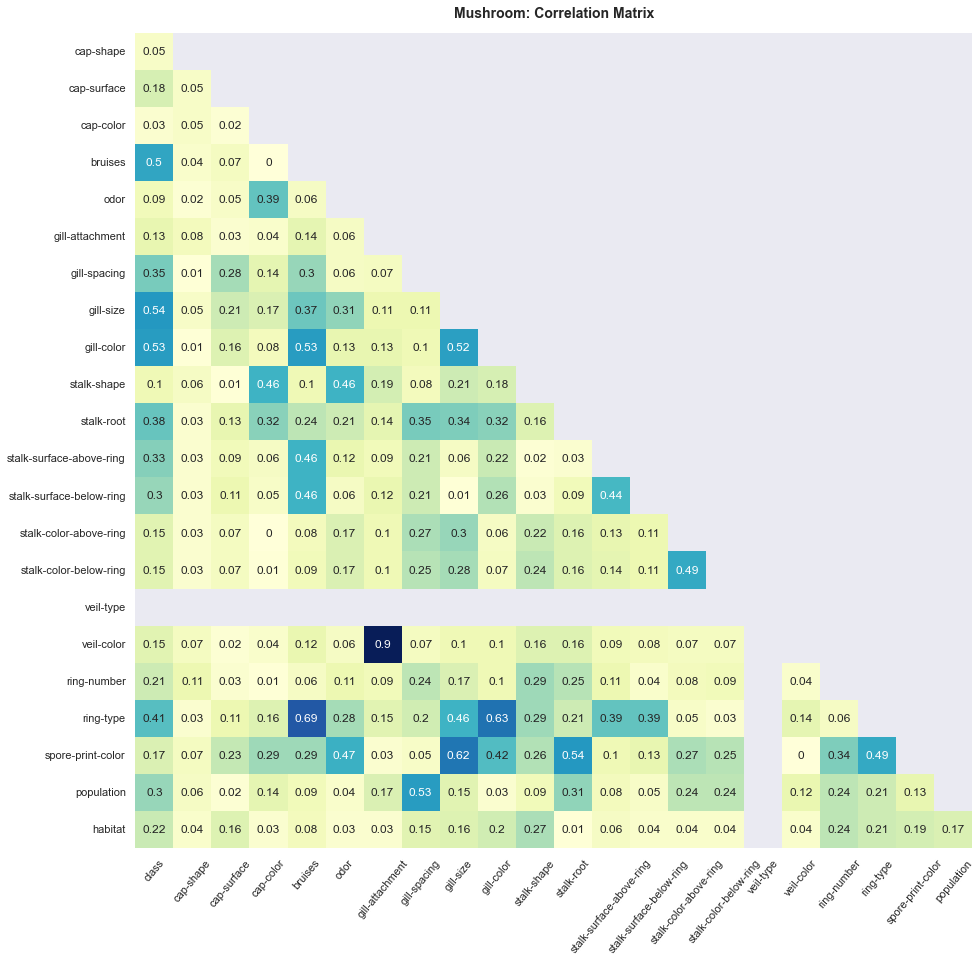

In [23]:
# Set Figure Size
sns.set(rc={'figure.figsize':(15,15)})

# Visually display the matrix from above
# use the yellow-green-blue color map so that high correlations are more easily identifiable
h = sns.heatmap(mush_corr_tri, annot=True, cmap="YlGnBu", cbar=False)

# Add plot title 
h.set_title('Mushroom: Correlation Matrix', size=14, weight='bold', pad=15)

# rotate tick marks so they are easier to read
plt.xticks(rotation=50)

# Display plot
plt.show()

The above correlation matrix is displaying that the following variables have the highest correlations with "class" (cap-diameter, cap-shape, stem-height, and stem-width). Please note, there is only one class available for "veil-type," which makes this variable unuseable for analysis.

In [21]:
# Create refined data set with only those variables
mushroom_final = mushroom[['bruises', 'gill-size', 'gill-color', 'ring-type', 'class']]

**Standardize Variables**

Standardize variables and split into training vs. testing

In [22]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Get our predicted variables
X = mushroom_final.drop('class', axis=1)
# Get our outcome variable
y = mushroom_final['class']

# Split our data into training vs. testing
# We want to compute the model on our training data to train the model
# We then use that model on our testing data set to see the performance
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state=33, stratify=y)

# Standardize our data
sc=StandardScaler()
# Standardize training values
X_train = sc.fit_transform(X_train)
# Standardize testing values
X_test=sc.fit_transform(X_test)

### Logistic Regression

In [23]:
# Needed to run the logistic regression
from sklearn.linear_model import LogisticRegression

# Compute the logistic regression
logreg_model = LogisticRegression(random_state=33).fit(X_train, y_train)

# Find the predicted values (predict edible or poisonous)
y_predicted = logreg_model.predict(X_test)

In [24]:
# Import modules to compute classification report
from sklearn.metrics import classification_report

# See a classification report so that we know how well we did at predicting diabetes
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1263
           1       0.82      0.77      0.79      1175

    accuracy                           0.81      2438
   macro avg       0.81      0.80      0.81      2438
weighted avg       0.81      0.81      0.81      2438



### Decision Tree

### Random Forest

### XGBoost